In [30]:
import pandas as pd 
from sqlalchemy import create_engine 
import numpy as np
import pymongo
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import calendar
import scipy.stats as sts

In [ ]:
#compare home price to number of houses sold
#check median sales price trends by borough
#what homes are people buying and where

In [20]:
# Create a group based on the values in the 'maker' column
sl_month = sales_data.groupby('sale_month_year')

# Count how many times each maker appears in our group
count_sales = sl_month['sale_month_year'].count()

count_sales

sale_month_year
2019-07    6999
2019-08    7633
2019-09    6731
2019-10    7558
2019-11    6442
2019-12    7387
2020-01    7173
2020-02    6313
2020-03    5054
2020-04    2808
2020-05    3374
2020-06    3398
Name: sale_month_year, dtype: int64

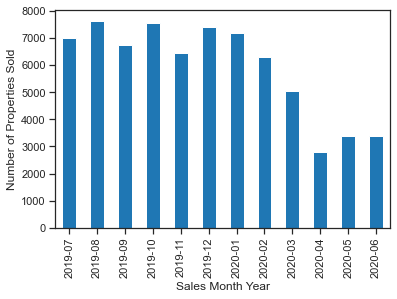

<Figure size 432x288 with 0 Axes>

In [21]:
# Create a bar chart based off of the group series from before
colors = [
    "#1f77b4",
   
]
count_chart = count_sales.plot(kind='bar', color=colors)

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Sales Month Year")
count_chart.set_ylabel("Number of Properties Sold")


plt.show()
plt.tight_layout()

### Data Analysis Using Combined Data

In [31]:
#Read csv file
ny_comb_sales_df = pd.read_csv("./CombinedData.csv",encoding='utf-8', low_memory=False)
# ny_comb_sales_df = pd.read_csv("CombinedData.csv")
ny_comb_sales_df.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALEDATE
0,0,1,FINANCIAL,14 RENTALS - 4-10 UNIT,7,38,60 PEARL STREET,NaN,10004.0,3,2,5,"1,491","7,485","1,900",2,S9,"4,027,000",2016-01-01
1,1,1,HARLEM-EAST,01 ONE FAMILY DWELLINGS,1643,122,155 EAST 115 STREET,NaN,10029.0,1,0,1,"1,345","2,800","1,900",1,A4,0,2016-01-01
2,2,1,HARLEM-EAST,07 RENTALS - WALKUP APARTMENTS,1643,123,157 EAST 115 STREET,NaN,10029.0,12,1,13,"1,345","3,535","1,900",2,C5,0,2016-01-01
3,3,1,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,1320,4247,211 EAST 46TH STREET,33J,10017.0,1,0,1,0,0,"1,979",2,R4,0,2016-01-01
4,4,1,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,1365,1526,400 EAST 54TH STREET,30H,10022.0,1,0,1,0,0,"1,972",2,R4,0,2016-01-01
5,5,1,MIDTOWN WEST,13 CONDOS - ELEVATOR APARTMENTS,1042,1314,310 WEST 52ND STREET,PHC,10019.0,1,0,1,0,0,"2,005",2,R4,0,2016-01-01
6,6,1,MIDTOWN WEST,26 OTHER HOTELS,1009,37,102 WEST 57TH STREET,NaN,10019.0,0,2,2,"7,532","112,850","2,007",4,H3,0,2016-01-01
7,7,1,MIDTOWN WEST,26 OTHER HOTELS,1009,37,102 WEST 57TH STREET,NaN,10019.0,0,2,2,"7,532","112,850","2,007",4,H3,0,2016-01-01
8,8,1,MIDTOWN WEST,47 CONDO NON-BUSINESS STORAGE,1042,1316,310 WEST 52ND STREET,SU1,10019.0,0,0,1,0,0,"2,005",4,RS,0,2016-01-01
9,9,1,MURRAY HILL,13 CONDOS - ELEVATOR APARTMENTS,869,1066,445 5 AVENUE,17E,10016.0,1,0,1,0,0,"1,986",2,R4,0,2016-01-01


In [3]:
%pwd

'C:\\Users\\FSABR\\UCBWork\\final_project_data'

In [32]:
#Update column names to lowercase and remove spaces
ny_comb_sales_df.columns = ['unnamed','borough','neighborhood','building_class_category',
                       'block','lot','address','apartment_number','zip_code','residential_units','commercial_units','total_units','land_square_feet',
                       'gross_square_feet','year_built','tax_class_at_time_of_sale','building_class_at_time_of_sale',
                       'sale_price','sale_date']
ny_comb_sales_df.head()

,unnamed,borough,neighborhood,building_class_category,block,lot,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,0,1,FINANCIAL,14 RENTALS - 4-10 UNIT,7,38,60 PEARL STREET,NaN,10004.0,3,2,5,"1,491","7,485","1,900",2,S9,"4,027,000",2016-01-01
1,1,1,HARLEM-EAST,01 ONE FAMILY DWELLINGS,1643,122,155 EAST 115 STREET,NaN,10029.0,1,0,1,"1,345","2,800","1,900",1,A4,0,2016-01-01
2,2,1,HARLEM-EAST,07 RENTALS - WALKUP APARTMENTS,1643,123,157 EAST 115 STREET,NaN,10029.0,12,1,13,"1,345","3,535","1,900",2,C5,0,2016-01-01
3,3,1,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,1320,4247,211 EAST 46TH STREET,33J,10017.0,1,0,1,0,0,"1,979",2,R4,0,2016-01-01
4,4,1,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,1365,1526,400 EAST 54TH STREET,30H,10022.0,1,0,1,0,0,"1,972",2,R4,0,2016-01-01


In [33]:
ny_comb_sales_df['borough'].value_counts()

4    116519
3    105249
1     80286
5     37571
2     33554
Name: borough, dtype: int64

In [34]:
ny_comb_sales_df.dtypes

unnamed                             int64
borough                             int64
neighborhood                       object
building_class_category            object
block                               int64
lot                                 int64
address                            object
apartment_number                   object
zip_code                          float64
residential_units                  object
commercial_units                   object
total_units                        object
land_square_feet                   object
gross_square_feet                  object
year_built                         object
tax_class_at_time_of_sale           int64
building_class_at_time_of_sale     object
sale_price                         object
sale_date                          object
dtype: object

In [35]:
#Convert year built value from float to integer
ny_comb_sales_df['year_built'] = ny_comb_sales_df['year_built'].astype('Int64')

TypeError: object cannot be converted to an IntegerDtype

In [36]:
ny_comb_sales_df.head()

,unnamed,borough,neighborhood,building_class_category,block,lot,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,0,1,FINANCIAL,14 RENTALS - 4-10 UNIT,7,38,60 PEARL STREET,NaN,10004.0,3,2,5,"1,491","7,485","1,900",2,S9,"4,027,000",2016-01-01
1,1,1,HARLEM-EAST,01 ONE FAMILY DWELLINGS,1643,122,155 EAST 115 STREET,NaN,10029.0,1,0,1,"1,345","2,800","1,900",1,A4,0,2016-01-01
2,2,1,HARLEM-EAST,07 RENTALS - WALKUP APARTMENTS,1643,123,157 EAST 115 STREET,NaN,10029.0,12,1,13,"1,345","3,535","1,900",2,C5,0,2016-01-01
3,3,1,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,1320,4247,211 EAST 46TH STREET,33J,10017.0,1,0,1,0,0,"1,979",2,R4,0,2016-01-01
4,4,1,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,1365,1526,400 EAST 54TH STREET,30H,10022.0,1,0,1,0,0,"1,972",2,R4,0,2016-01-01


In [37]:
yoy_sales = ny_comb_sales_df.loc[ny_comb_sales_df['sale_date'] >= '2019-01-01']
yoy_sales.head()

,unnamed,borough,neighborhood,building_class_category,block,lot,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
262248,262248,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,716,1246,"447 WEST 18TH STREET, PH12A",PH12A,10011.0,1.0,0.0,1.0,"10,733","1,979","2,007",2,R4,0,2019-01-01
262249,262249,1,FASHION,21 OFFICE BUILDINGS,812,68,144 WEST 37TH STREET,NaN,10018.0,0.0,6.0,6.0,"2,962","15,435","1,920",4,O5,0,2019-01-01
262250,262250,1,FASHION,21 OFFICE BUILDINGS,839,69,40 WEST 38TH STREET,NaN,10018.0,0.0,7.0,7.0,"2,074","11,332","1,930",4,O5,0,2019-01-01
262251,262251,1,GREENWICH VILLAGE-WEST,13 CONDOS - ELEVATOR APARTMENTS,592,1041,"1 SHERIDAN SQUARE, 8C",8C,10014.0,1.0,0.0,1.0,0,500,0,2,R4,0,2019-01-01
262252,262252,1,UPPER EAST SIDE (59-79),15 CONDOS - 2-10 UNIT RESIDENTIAL,1379,1402,"20 EAST 65TH STREET, B",B,10065.0,1.0,0.0,1.0,0,"6,406",0,2,R1,0,2019-01-01


In [38]:
yoy_sales_df = yoy_sales[['borough','neighborhood','building_class_category','gross_square_feet','year_built', 'sale_price','sale_date']]
yoy_sales_df.head()

,borough,neighborhood,building_class_category,gross_square_feet,year_built,sale_price,sale_date
262248,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,"1,979","2,007",0,2019-01-01
262249,1,FASHION,21 OFFICE BUILDINGS,"15,435","1,920",0,2019-01-01
262250,1,FASHION,21 OFFICE BUILDINGS,"11,332","1,930",0,2019-01-01
262251,1,GREENWICH VILLAGE-WEST,13 CONDOS - ELEVATOR APARTMENTS,500,0,0,2019-01-01
262252,1,UPPER EAST SIDE (59-79),15 CONDOS - 2-10 UNIT RESIDENTIAL,"6,406",0,0,2019-01-01


In [39]:
len(yoy_sales_df.index)

110931

In [40]:
yoy_sales_df['sale_price'] = yoy_sales_df['sale_price'].str.replace(',', '').astype('int64')
yoy_sales_df.head()

C:\Users\FSABR\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,borough,neighborhood,building_class_category,gross_square_feet,year_built,sale_price,sale_date
262248,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,"1,979","2,007",0,2019-01-01
262249,1,FASHION,21 OFFICE BUILDINGS,"15,435","1,920",0,2019-01-01
262250,1,FASHION,21 OFFICE BUILDINGS,"11,332","1,930",0,2019-01-01
262251,1,GREENWICH VILLAGE-WEST,13 CONDOS - ELEVATOR APARTMENTS,500,0,0,2019-01-01
262252,1,UPPER EAST SIDE (59-79),15 CONDOS - 2-10 UNIT RESIDENTIAL,"6,406",0,0,2019-01-01


In [41]:
#add new column borough name based on the value in the borough field

def func(row):
    if row['borough'] == 1:
        return 'manhattan'
    elif row['borough'] ==2:
        return 'bronx'
    elif row['borough'] ==3:
        return 'brooklyn'
    elif row['borough'] ==4:
        return 'queens'
    elif row['borough'] ==5:
        return 'staten island'
    else:
        return 'other'

yoy_sales_df['borough_name'] = yoy_sales_df.apply(func, axis=1)
yoy_sales_df.head()

C:\Users\FSABR\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,borough,neighborhood,building_class_category,gross_square_feet,year_built,sale_price,sale_date,borough_name
262248,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,"1,979","2,007",0,2019-01-01,manhattan
262249,1,FASHION,21 OFFICE BUILDINGS,"15,435","1,920",0,2019-01-01,manhattan
262250,1,FASHION,21 OFFICE BUILDINGS,"11,332","1,930",0,2019-01-01,manhattan
262251,1,GREENWICH VILLAGE-WEST,13 CONDOS - ELEVATOR APARTMENTS,500,0,0,2019-01-01,manhattan
262252,1,UPPER EAST SIDE (59-79),15 CONDOS - 2-10 UNIT RESIDENTIAL,"6,406",0,0,2019-01-01,manhattan


In [42]:
yoy_sales_df['sale_date'] = yoy_sales_df['sale_date'].astype('datetime64[ns]')

C:\Users\FSABR\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
yoy_sales_df['sale_month_year'] = yoy_sales_df['sale_date'].dt.strftime('%Y-%m')
yoy_sales_df.head()

C:\Users\FSABR\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,borough,neighborhood,building_class_category,gross_square_feet,year_built,sale_price,sale_date,borough_name,sale_month_year
262248,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,"1,979","2,007",0,2019-01-01,manhattan,2019-01
262249,1,FASHION,21 OFFICE BUILDINGS,"15,435","1,920",0,2019-01-01,manhattan,2019-01
262250,1,FASHION,21 OFFICE BUILDINGS,"11,332","1,930",0,2019-01-01,manhattan,2019-01
262251,1,GREENWICH VILLAGE-WEST,13 CONDOS - ELEVATOR APARTMENTS,500,0,0,2019-01-01,manhattan,2019-01
262252,1,UPPER EAST SIDE (59-79),15 CONDOS - 2-10 UNIT RESIDENTIAL,"6,406",0,0,2019-01-01,manhattan,2019-01


In [44]:
yoy_sales_df.dtypes

borough                             int64
neighborhood                       object
building_class_category            object
gross_square_feet                  object
year_built                         object
sale_price                          int64
sale_date                  datetime64[ns]
borough_name                       object
sale_month_year                    object
dtype: object

In [45]:
yoy_sales_df['year'] = yoy_sales_df['sale_date'].dt.year
yoy_sales_df['month'] = yoy_sales_df['sale_date'].dt.month
yoy_sales_df.head()

C:\Users\FSABR\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\FSABR\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,borough,neighborhood,building_class_category,gross_square_feet,year_built,sale_price,sale_date,borough_name,sale_month_year,year,month
262248,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,"1,979","2,007",0,2019-01-01,manhattan,2019-01,2019,1
262249,1,FASHION,21 OFFICE BUILDINGS,"15,435","1,920",0,2019-01-01,manhattan,2019-01,2019,1
262250,1,FASHION,21 OFFICE BUILDINGS,"11,332","1,930",0,2019-01-01,manhattan,2019-01,2019,1
262251,1,GREENWICH VILLAGE-WEST,13 CONDOS - ELEVATOR APARTMENTS,500,0,0,2019-01-01,manhattan,2019-01,2019,1
262252,1,UPPER EAST SIDE (59-79),15 CONDOS - 2-10 UNIT RESIDENTIAL,"6,406",0,0,2019-01-01,manhattan,2019-01,2019,1


In [46]:
yoy_sales_df['month_name'] = yoy_sales_df['month'].apply(lambda x: calendar.month_abbr[x])
yoy_sales_df.head()

C:\Users\FSABR\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,borough,neighborhood,building_class_category,gross_square_feet,year_built,sale_price,sale_date,borough_name,sale_month_year,year,month,month_name
262248,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,"1,979","2,007",0,2019-01-01,manhattan,2019-01,2019,1,Jan
262249,1,FASHION,21 OFFICE BUILDINGS,"15,435","1,920",0,2019-01-01,manhattan,2019-01,2019,1,Jan
262250,1,FASHION,21 OFFICE BUILDINGS,"11,332","1,930",0,2019-01-01,manhattan,2019-01,2019,1,Jan
262251,1,GREENWICH VILLAGE-WEST,13 CONDOS - ELEVATOR APARTMENTS,500,0,0,2019-01-01,manhattan,2019-01,2019,1,Jan
262252,1,UPPER EAST SIDE (59-79),15 CONDOS - 2-10 UNIT RESIDENTIAL,"6,406",0,0,2019-01-01,manhattan,2019-01,2019,1,Jan


In [47]:
# Set the 'borough' as our index
yoy_sales_df = yoy_sales_df.set_index('borough')
yoy_sales_df.head()

,neighborhood,building_class_category,gross_square_feet,year_built,sale_price,sale_date,borough_name,sale_month_year,year,month,month_name
borough,,,,,,,,,,,
1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,"1,979","2,007",0,2019-01-01,manhattan,2019-01,2019,1,Jan
1,FASHION,21 OFFICE BUILDINGS,"15,435","1,920",0,2019-01-01,manhattan,2019-01,2019,1,Jan
1,FASHION,21 OFFICE BUILDINGS,"11,332","1,930",0,2019-01-01,manhattan,2019-01,2019,1,Jan
1,GREENWICH VILLAGE-WEST,13 CONDOS - ELEVATOR APARTMENTS,500,0,0,2019-01-01,manhattan,2019-01,2019,1,Jan
1,UPPER EAST SIDE (59-79),15 CONDOS - 2-10 UNIT RESIDENTIAL,"6,406",0,0,2019-01-01,manhattan,2019-01,2019,1,Jan


In [48]:
yoy_sales_grp_cnt = yoy_sales_df.groupby(['year','month'])['month'].count()
yoy_sales_grp_cnt

year  month
2019  1        6464
      2        5863
      3        6589
      4        6907
      5        7533
      6        7900
      7        6955
      8        7564
      9        6617
      10       7302
      11       6212
      12       6905
2020  1        7173
      2        6313
      3        5054
      4        2808
      5        3374
      6        3398
Name: month, dtype: int64

In [49]:
yoy_sales_grp_cnt = yoy_sales_grp_cnt.loc[yoy_sales_grp_cnt.index.get_level_values(1) <= 6]
yoy_sales_grp_cnt

year  month
2019  1        6464
      2        5863
      3        6589
      4        6907
      5        7533
      6        7900
2020  1        7173
      2        6313
      3        5054
      4        2808
      5        3374
      6        3398
Name: month, dtype: int64

In [50]:
months= yoy_sales_grp_cnt.loc[yoy_sales_grp_cnt.index.get_level_values(0) == 2019].index.get_level_values(1)
months

Int64Index([1, 2, 3, 4, 5, 6], dtype='int64', name='month')

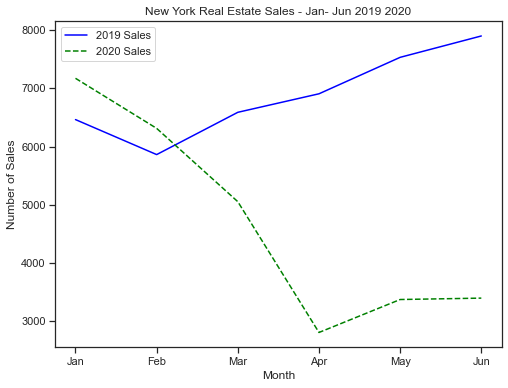

In [78]:
# Plot the world average as a line chart
plt.figure(figsize=(8,6))
_2019, = plt.plot(months,yoy_sales_grp_cnt.loc[yoy_sales_grp_cnt.index.get_level_values(0) == 2019], color="blue", label="2019 Sales" )

# Plot the unemployment values for a single country
_2020, = plt.plot(months,yoy_sales_grp_cnt.loc[yoy_sales_grp_cnt.index.get_level_values(0) == 2020], color="green", label="2020 Sales",linestyle='--' )

       
plt.xticks(months,['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun'])       

# Create a legend for our chart
plt.legend(handles=[_2019, _2020], loc="best")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.title("New York Real Estate Sales - Jan- Jun 2019 2020")

plt.savefig('yoy_sales.png')

# Show the chart
plt.show()


### Working with 2020 data

In [53]:
covid_analysis_df = yoy_sales_df.loc[yoy_sales_df['sale_date'] >= '2020-01-01']
covid_analysis_df.head()

,neighborhood,building_class_category,gross_square_feet,year_built,sale_price,sale_date,borough_name,sale_month_year,year,month,month_name
borough,,,,,,,,,,,
2,BATHGATE,01 ONE FAMILY DWELLINGS,"1,587",1899.0,458000,2020-01-31,bronx,2020-01,2020,1,Jan
2,BATHGATE,01 ONE FAMILY DWELLINGS,"1,495",1899.0,275000,2020-03-16,bronx,2020-03,2020,3,Mar
2,BATHGATE,01 ONE FAMILY DWELLINGS,"1,260",1910.0,165000,2020-03-02,bronx,2020-03,2020,3,Mar
2,BATHGATE,02 TWO FAMILY DWELLINGS,"2,400",1993.0,0,2020-03-17,bronx,2020-03,2020,3,Mar
2,BATHGATE,02 TWO FAMILY DWELLINGS,"2,394",1995.0,0,2020-04-06,bronx,2020-04,2020,4,Apr


In [54]:
len(covid_analysis_df.index)

28120

In [55]:
bor_sales= covid_analysis_df.groupby(['month','borough_name'])['borough_name'].count()
bor_sales

month  borough_name 
1      bronx             657
       brooklyn         2020
       manhattan        1606
       queens           2251
       staten island     639
2      bronx             607
       brooklyn         1753
       manhattan        1377
       queens           1934
       staten island     642
3      bronx             480
       brooklyn         1494
       manhattan         960
       queens           1659
       staten island     461
4      bronx             265
       brooklyn          838
       manhattan         575
       queens            861
       staten island     269
5      bronx             291
       brooklyn         1095
       manhattan         701
       queens           1011
       staten island     276
6      bronx             335
       brooklyn         1091
       manhattan         766
       queens           1096
       staten island     110
Name: borough_name, dtype: int64

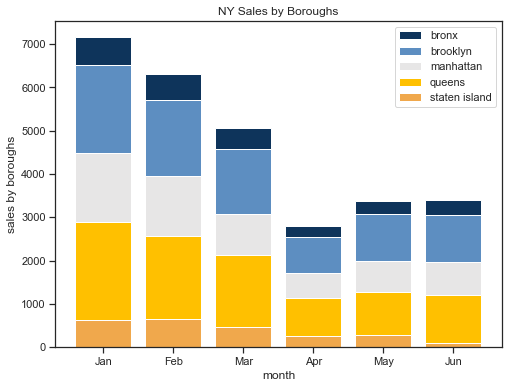

In [77]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun']
bronx = np.array(bor_sales.loc[bor_sales.index.get_level_values(1) == 'bronx'])
brooklyn = np.array(bor_sales.loc[bor_sales.index.get_level_values(1) == 'brooklyn'])
manhattan = np.array(bor_sales.loc[bor_sales.index.get_level_values(1) == 'manhattan'])
queens = np.array(bor_sales.loc[bor_sales.index.get_level_values(1) == 'queens'])
staten_island = np.array(bor_sales.loc[bor_sales.index.get_level_values(1) == 'staten island'])
ind = [x for x in month]

plt.figure(figsize=(8,6))
plt.bar(ind, bronx , width=0.8, label='bronx', color='#0E345B', bottom=brooklyn+manhattan+queens+staten_island)
plt.bar(ind, brooklyn, width=0.8, label='brooklyn', color='#5D8EC1', bottom=manhattan+queens+staten_island)
plt.bar(ind, manhattan, width=0.8, label='manhattan', color='#E7E6E6',bottom=queens+staten_island)
plt.bar(ind, queens, width=0.8, label='queens', color='#FFC000', bottom=staten_island)
plt.bar(ind, staten_island, width=0.8, label='staten island', color='#F0A84C')

plt.xticks(ind, month)
plt.ylabel("sales by boroughs")
plt.xlabel("month")
plt.legend(loc="upper right")
plt.title("NY Sales by Boroughs")
plt.savefig('NY Boroughs 2020')

plt.show()


In [57]:
covid_analysis_df = covid_analysis_df.loc[(covid_analysis_df['sale_price'] > 1000) & (covid_analysis_df['sale_price'] <=5000000)]
covid_analysis_df.head()

,neighborhood,building_class_category,gross_square_feet,year_built,sale_price,sale_date,borough_name,sale_month_year,year,month,month_name
borough,,,,,,,,,,,
2,BATHGATE,01 ONE FAMILY DWELLINGS,"1,587",1899.0,458000,2020-01-31,bronx,2020-01,2020,1,Jan
2,BATHGATE,01 ONE FAMILY DWELLINGS,"1,495",1899.0,275000,2020-03-16,bronx,2020-03,2020,3,Mar
2,BATHGATE,01 ONE FAMILY DWELLINGS,"1,260",1910.0,165000,2020-03-02,bronx,2020-03,2020,3,Mar
2,BATHGATE,02 TWO FAMILY DWELLINGS,"2,364",1899.0,734000,2020-04-22,bronx,2020-04,2020,4,Apr
2,BATHGATE,02 TWO FAMILY DWELLINGS,"3,204",1995.0,645000,2020-01-28,bronx,2020-01,2020,1,Jan


In [79]:
med_sls = covid_analysis_df[['borough_name','sale_price','month']]
med_sls.head()

,borough_name,sale_price,month
borough,,,
2,bronx,458000,1
2,bronx,275000,3
2,bronx,165000,3
2,bronx,734000,4
2,bronx,645000,1


In [80]:
med_sls_cnt = med_sls.groupby(['month','borough_name']).median().astype(int) 
med_sls_cnt

sale_price
month borough_name             
1     bronx              495000
      brooklyn           800000
      manhattan         1035000
      queens             630000
      staten island      530000
2     bronx              486000
      brooklyn           800000
      manhattan          995000
      queens             569000
      staten island      549000
3     bronx              562500
      brooklyn           816500
      manhattan         1025000
      queens             615000
      staten island      537500
4     bronx              560038
      brooklyn           770178
      manhattan         1100000
      queens             630000
      staten island      575000
5     bronx              519000
      brooklyn           822391
      manhattan          952500
      queens             600000
      staten island      542636
6     bronx              520000
      brooklyn           822955
      manhattan          896000
      queens             590000
      staten island      575000

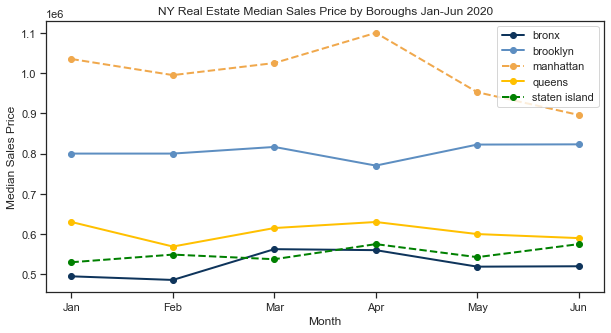

In [87]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun']

bronx = np.array(med_sls_cnt.loc[med_sls_cnt.index.get_level_values(1) == 'bronx'])
brooklyn = np.array(med_sls_cnt.loc[med_sls_cnt.index.get_level_values(1) == 'brooklyn'])
manhattan = np.array(med_sls_cnt.loc[med_sls_cnt.index.get_level_values(1) == 'manhattan'])
queens = np.array(med_sls_cnt.loc[med_sls_cnt.index.get_level_values(1) == 'queens'])
staten_island = np.array(med_sls_cnt.loc[med_sls_cnt.index.get_level_values(1) == 'staten island'])
ind = [x for x in month]

plt.figure(figsize=(10,5))
plt.plot( month, bronx, marker='o', color='#0E345B', linewidth=2,label="bronx"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  )
plt.plot( month, brooklyn, marker='o', color='#5D8EC1', linewidth=2, label="brooklyn")
plt.plot( month, manhattan, marker='o', color='#F0A84C', linewidth=2, linestyle='dashed', label="manhattan")
plt.plot( month, queens, marker='o', color='#FFC000', linewidth=2, label = "queens")
plt.plot( month, staten_island, marker='o', color='green', linewidth=2, linestyle='dashed', label="staten island")

plt.ylabel("Median Sales Price")
plt.xlabel("Month")
plt.title("NY Real Estate Median Sales Price by Boroughs Jan-Jun 2020")
plt.savefig('NY Boroughs Median Sales 2020')
plt.legend()


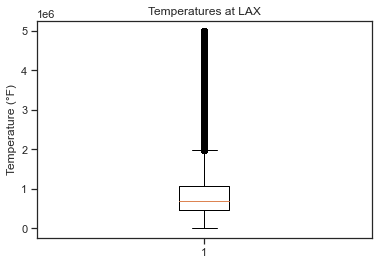

In [82]:


fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Temperature (°F)')
ax1.boxplot(covid_analysis_df['sale_price'])
plt.show()